## Transfer Learning using ResNet50



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Brain/Train'
valid_path = '/content/drive/MyDrive/Brain/Test'


In [ ]:
# Import the ResNet50 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Brain/Train/*')

In [ ]:
len(folders)

2

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='sigmoid')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
 # tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Brain/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 244 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Brain/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 9 images belonging to 2 classes.


In [ ]:
training_set="/content/drive/MyDrive/Brain/Train/"
test_set="/content/drive/MyDrive/Brain/Test/"

In [ ]:
len(training_set)

35

In [ ]:
len(test_set)

34

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
8/8 [==============================] - 44s 4s/step - loss: 4.3228 - accuracy: 0.5246 - val_loss: 6.6145 - val_accuracy: 0.5556
Epoch 2/50
8/8 [==============================] - 4s 465ms/step - loss: 3.1876 - accuracy: 0.5697 - val_loss: 1.9095 - val_accuracy: 0.5556
Epoch 3/50
8/8 [==============================] - 4s 474ms/step - loss: 1.6510 - accuracy: 0.6639 - val_loss: 0.6212 - val_accuracy: 0.5556
Epoch 4/50
8/8 [==============================] - 4s 473ms/step - loss: 1.2369 - accuracy: 0.7049 - val_loss: 0.6574 - val_accuracy: 0.5556
Epoch 5/50
8/8 [==============================] - 4s 516ms/step - loss: 1.4048 - accuracy: 0.6680 - val_loss: 0.4664 - val_accuracy: 0.7778
Epoch 6/50
8/8 [==============================] - 4s 510ms/step - loss: 1.9470 - accuracy: 0.5984 - val_loss: 1.8517 - val_accuracy: 0.5556
Epoch 7/50
8/8 [==============================] - 4s 484ms/step - loss: 1.3830 - accuracy: 0.6598 - val_loss: 1.5484 - val_accuracy: 0.5556
Epoch 8/50
8/8 [======

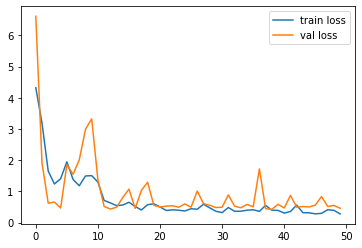

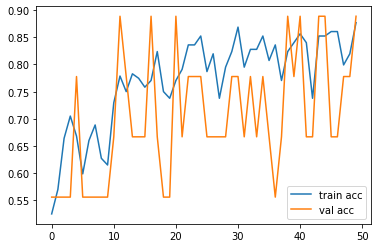

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[0.49961656, 0.3929681 ],
       [0.3106787 , 0.5550308 ],
       [0.16046181, 0.75682014],
       [0.08598878, 0.81929266],
       [0.38752493, 0.44673693],
       [0.49062005, 0.2623931 ],
       [0.26521605, 0.66408974],
       [0.32857856, 0.4902786 ],
       [0.79418075, 0.18077439]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img_data

array([[[[ 6.7060997e+01,  5.4221001e+01,  4.7320000e+01],
         [ 6.9060997e+01,  5.6221001e+01,  4.9320000e+01],
         [ 7.3060997e+01,  6.0221001e+01,  5.3320000e+01],
         ...,
         [ 7.4060997e+01,  5.6221001e+01,  4.6320000e+01],
         [ 5.5060997e+01,  3.7221001e+01,  2.7320000e+01],
         [ 4.1060997e+01,  2.3221001e+01,  1.3320000e+01]],

        [[ 7.5060997e+01,  6.2221001e+01,  5.5320000e+01],
         [ 7.8060997e+01,  6.5221001e+01,  5.8320000e+01],
         [ 8.1060997e+01,  6.8221001e+01,  6.1320000e+01],
         ...,
         [ 9.7060997e+01,  7.9221001e+01,  6.9320000e+01],
         [ 7.3060997e+01,  5.5221001e+01,  4.5320000e+01],
         [ 4.9060997e+01,  3.1221001e+01,  2.1320000e+01]],

        [[ 8.7060997e+01,  7.4221001e+01,  6.7320000e+01],
         [ 9.0060997e+01,  7.7221001e+01,  7.0320000e+01],
         [ 9.3060997e+01,  8.0221001e+01,  7.3320000e+01],
         ...,
         [ 1.0106100e+02,  8.3221001e+01,  7.3320000e+01],
         [

In [ ]:
img=image.load_img('/content/drive/MyDrive/Brain/Train/yes/Y1.jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        ...,
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]],

       [[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        ...,
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]],

       [[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        ...,
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]],

       ...,

       [[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        ...,
        [2., 2., 2.],
        [3., 3., 3.],
        [3., 3., 3.]],

       [[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [2., 2., 2.]],

       [[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [2., 2., 2.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[1.9246154e-05, 9.9996459e-01]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([ True])

In [ ]:
a

array([1])